In [2]:
import numpy as np
np.set_printoptions(suppress=True)
fuji = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### [Problem 1] Data visualization

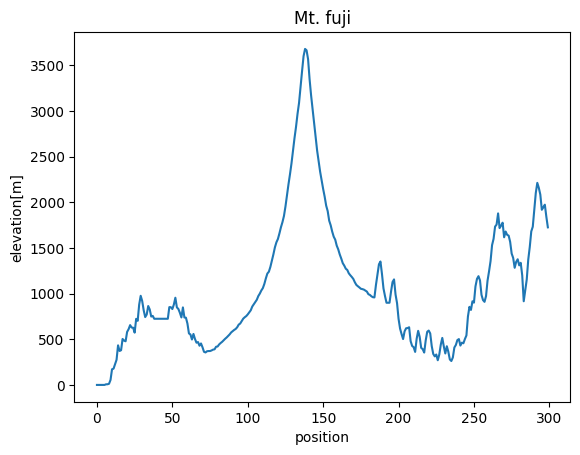

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#x axis
plt.xlabel("position")
#y axis
plt.ylabel("elevation[m]")
#title
plt.title("Mt. fuji")
plt.plot(fuji[:,0], fuji[:,3],)
plt.show()

### [Problem 2] Create a function to calculate the gradient at a certain point

In [4]:
def gradient(x):
  return (fuji[x,3] - fuji[x-1,3]) / (x-(x-1))
gradient(136)

168.35000000000036

### [Problem 3] Create a function to calculate the destination point

In [5]:
def compute_next_position(position, elevation, alpha=0.1):
    next_position = position - alpha*gradient(position)
    next_position = np.maximum(1, next_position)
    next_position = np.minimum(len(elevation)-1, next_position)
    next_position_int = np.round(next_position).astype(np.int)
    return next_position_int

position = 136
fuji_elevations = fuji[:,3]

next_position = compute_next_position(position, fuji_elevations, alpha=0.1)
print(position, next_position)

136 119


<ipython-input-5-b2e7c5678cee>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


In [6]:
def gradient_descent(postion, elevations):
    return elevations[postion] - elevations[position - 1]

postion = 136
fuji_elevations = fuji[:, 3]

print(position, gradient_descent(position, fuji_elevations))

136 168.35000000000036


In [7]:
position = np.array([135, 136, 137])
fuji_elevations = fuji[:, 3]
next_position = compute_next_position(position, fuji_elevations, alpha = 0.1)
print(position, gradient_descent(position, fuji_elevations))

[135 136 137] [178.43 168.35 165.49]


<ipython-input-5-b2e7c5678cee>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


### [Problem 4] Create a function to go down the mountain

In [23]:
def descend_mount(start_position, elevations, alpha = 0.1):
    position = [start_position]
    while position[-1] not in position[:-1]:
        position.append(compute_next_position(position[-1], elevations, alpha = alpha))
    return position[:-1]

start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mount(start_position, fuji_elevations, alpha = 0.1)
print(descended_list)

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


<ipython-input-5-b2e7c5678cee>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


### [Problem 5] Visualization of the descent process

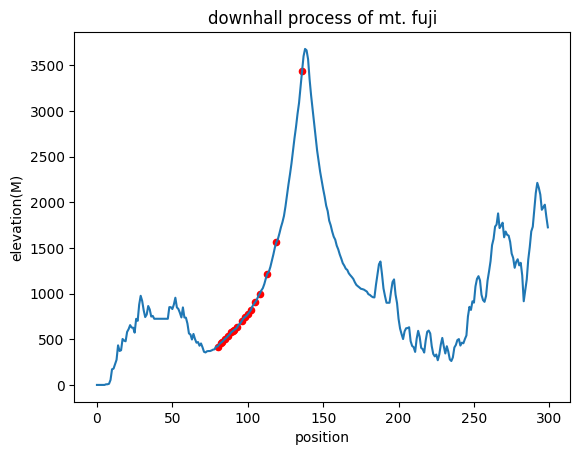

In [24]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

plt.title("downhall process of mt. fuji")
plt.xlabel("position")
plt.ylabel("elevation(M)")
plt.plot(fuji_elevations)
plt.scatter(descended_list, descended_elevations, 20, color = "red")
plt.show()

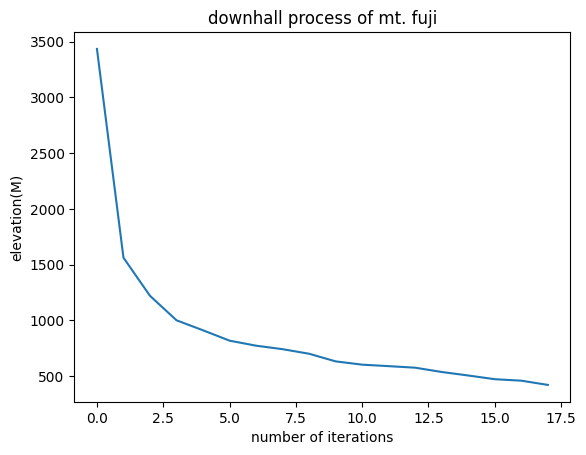

In [25]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

plt.title("downhall process of mt. fuji")
plt.xlabel("number of iterations")
plt.ylabel("elevation(M)")
plt.plot(descended_elevations)
plt.show()

### [Problem 6] Change of initial value

In [26]:
descended_list = []
for i, start_position in enumerate(range(1, 300)):
    descended_list.append(descend_mount(start_position, fuji[:, 3], alpha = 0.2))
    print(len(descended_list))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-5-b2e7c5678cee>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


### [Problem 7] Visualization of the descent process for each initial value

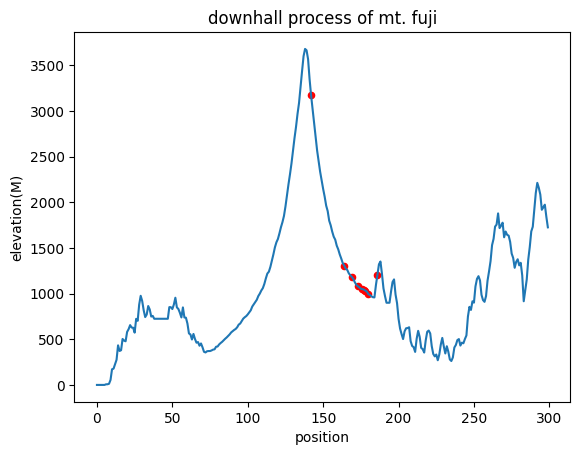

In [27]:
plt.title("downhall process of mt. fuji")
plt.xlabel("position")
plt.ylabel("elevation(M)")
plt.plot(fuji[:, 3])
plt.scatter(descended_list[141], fuji[:, 3][descended_list[141]], 20, color = "red")
plt.show()

### [Problem 8] (Advance problem) Hyperparameter changes

In [28]:
start_position = 136
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])
descended_list_alphas = []
for i, alpha in enumerate(alphas):
    descended_list_alphas.append(descend_mount(start_position, fuji[:, 3], alpha=alpha))
print(len(descended_list_alphas))

6


<ipython-input-5-b2e7c5678cee>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)
